In [2]:
import sys
sys.path.append("../scripts")

In [161]:
## General
import pandas as pd
import numpy as np

## Data cleaning/setup
from clean_data import load_and_clean_data
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

## Evaluation metrics
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

## Other
pd.set_option('display.max_rows', 400)

## Functions

In [18]:
def upsample(X, y):
    idx_class_1 = np.where(y == 1)[0]
    class_1 = X.iloc[idx_class_1]
    n_resample = len(X) - len(idx_class_1)
    X_upsampled = resample(class_1, n_samples = n_resample, random_state = 42)
    y_upsampled = y.loc[X_upsampled.index]
    X_up = pd.concat([X_upsampled, X.iloc[np.where(y == 0)[0]]])
    y_up = pd.concat([y_upsampled, y.iloc[np.where(y == 0)[0]]])
    
    return X_up, y_up

In [121]:
def run_model(X_train, y_train, X_val, y_val, model = DecisionTreeClassifier()):
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:,1]
    
    fpr, tpr, thresholds = roc_curve(y_val, y_pred)
    roc_auc = auc(fpr, tpr)
    
    return model, y_pred, roc_auc, fpr, tpr

## Data

#### Pull and split data

In [5]:
X_train, X_test, y_train, y_test = load_and_clean_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .25, random_state = 42)

C:\Users\preston\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3263: DtypeWarning: Columns (10,17,19,23,25,27,28,29,30,32,33,36,37,38,39,40,41,42,43,50,51,83,86,89,92,94,95,97,100,103,106,110,113,116,121,124,127,130,133,136,188,190,201,212,231,232,242,244,247,249,256,262,267,273,279,280,281,282,283,284,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,305,318,320,333,334) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):
C:\Users\preston\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\preston\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is 

#### Feature selection

In [36]:
selected_features = ["OTHBLEED", "PRBUN", "SSSIPATOS"]
X_train = X_train[selected_features]
X_val = X_val[selected_features]

===
# $TO \text{ } DO$:
Exchange 'selected_features' with an imported list of features


===

#### Upsampling

In [37]:
X_train_up, y_train_up = upsample(X_train, y_train)

## Hyperparameters

In [38]:
## NOTE: THE FORMAT FOR THESE SECTIONS ARE SUBJECT TO CHANGE
## Also, each dictionary contains the relevant hyperparameters for each model type
## Currently, each parameter is set to the default value for the given package's function

#### Logistic Regression

In [101]:
lr_params = {'penalty':'none', 'C':1.0, 'max_iter':100}
## Other penalty options: l2, l1, elasticnet

#### Decision Tree

In [63]:
dt_params = {'max_depth':None, 'min_samples_split':2, 'min_samples_leaf':1}

#### Random Forest

In [64]:
rf_params = {'max_depth':None, 'min_samples_split':2, 'min_samples_leaf':1}

#### XG Boost

In [94]:
xgb_params = {'max_depth': 2, 'eta': 1, 'eval_metric':'auc'}
## 'eval_metric' is not actually a hyperparameter. This is just necessary for the model to run
## It should be included in any hyperparameter tuning output

#### Full parameter dictionary

In [117]:
param_dict = {'lr':lr_params, 'dt':dt_params, 'rf':rf_params, 'xgb':xgb_params}

In [118]:
param_dict

{'lr': {'penalty': 'none', 'C': 1.0, 'max_iter': 100},
 'dt': {'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
 'rf': {'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
 'xgb': {'max_depth': 2, 'eta': 1, 'eval_metric': 'auc'}}

===
# $TO \text{ } DO$:
Replace 'param_dict' with an imported dictionary of parameter dictionaries for each model.
The format should match the printed 'param_dict' above. Any number of parameters can be added or removed.

===

## Modelling

In [163]:
results = {}

#### Logistic Regression

In [164]:
lr = LogisticRegression(**param_dict['lr'])
lr_mod, lr_pred, lr_auc, lr_fpr, lr_tpr = run_model(X_train_up, y_train_up, X_val, y_val, model=lr)
results["Logistic Regression"] = {'fpr':lr_fpr, 'tpr':lr_tpr, 'auc':lr_auc}

In [165]:
lr_auc

0.5804039634775751

#### Decision Tree

In [166]:
dt = DecisionTreeClassifier(**param_dict['dt'])
dt_mod, dt_pred, dt_auc, dt_fpr, dt_tpr = run_model(X_train, y_train, X_val, y_val, model=dt)
results["Decision Tree"] = {'fpr':dt_fpr, 'tpr':dt_tpr, 'auc':dt_auc}

In [167]:
dt_auc

0.590175430801934

#### Random Forest

In [168]:
rf = RandomForestClassifier(**param_dict['rf'])
rf_mod, rf_pred, rf_auc, rf_fpr, rf_tpr = run_model(X_train, y_train, X_val, y_val, model=rf)
results["Random Forest"] = {'fpr':rf_fpr, 'tpr':rf_tpr, 'auc':rf_auc}

In [169]:
rf_auc

0.5895049790560172

#### XG Boost

In [170]:
bst = xgb.XGBClassifier(**param_dict['xgb'])
bst_mod, bst_pred, bst_auc, bst_fpr, bst_tpr = run_model(X_train, y_train, X_val, y_val, model=bst)
results["XG Boost"] = {'fpr':bst_fpr, 'tpr':bst_tpr, 'auc':bst_auc}

C:\Users\preston\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [171]:
bst_auc

0.5916444041510858

## Plotting (to take over the world)

In [172]:
for r in results:
    print(r)

Logistic Regression
Decision Tree
Random Forest
XG Boost


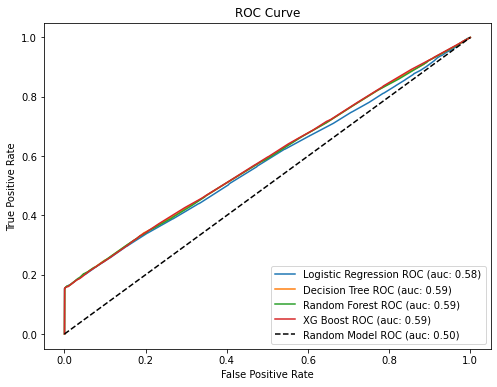

In [173]:
plt.figure(figsize = (8,6))
for mod in results:
    plt.plot(results[mod]['fpr'], results[mod]['tpr'], label='%s ROC (auc: %.2f)' %(mod, results[mod]['auc']))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    count += 1
plt.plot([0, 1], [0, 1], color='black', linestyle='--', label = 'Random Model ROC (auc: 0.50)')
plt.legend(loc = 'lower right')